In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\aggar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print(df['Transmission'].unique())
df.isna().sum()

['Manual' 'Automatic']


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
df['year']=2020
df['No of Years']=df['year']-df['Year']
df.drop(['Car_Name','Year','year'],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [5]:
final_df=pd.get_dummies(df,drop_first=True)
final_df.head()
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

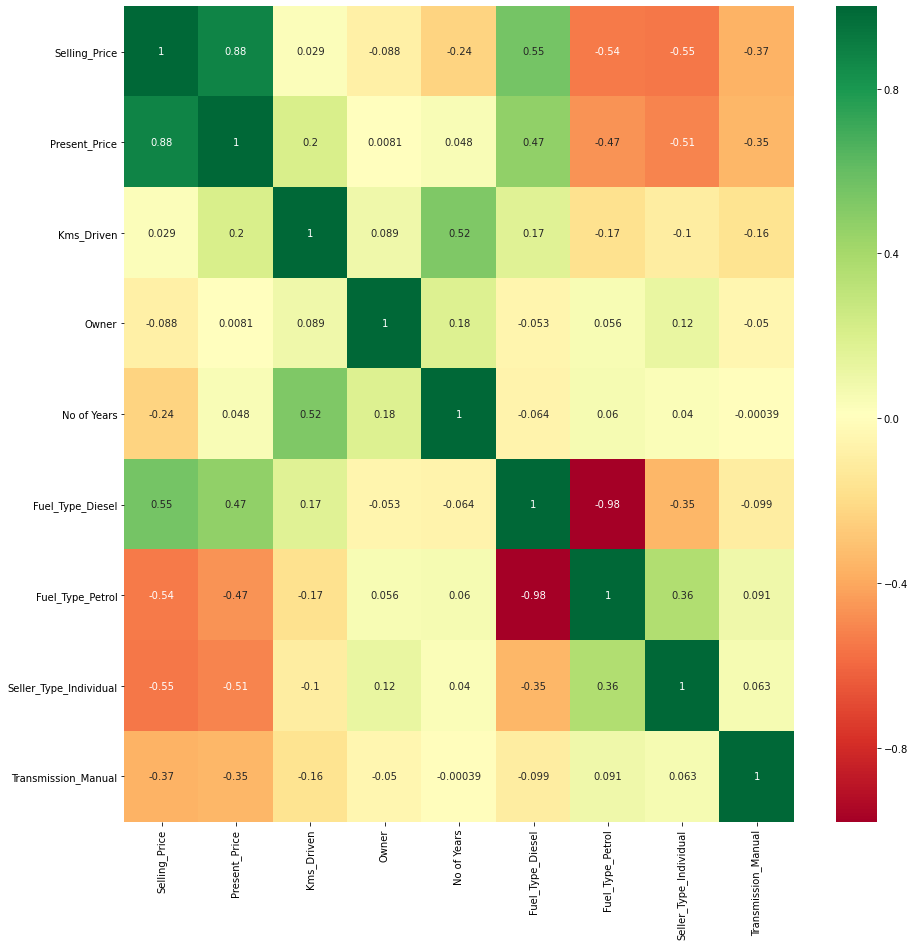

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(final_df.corr(),annot=True,cmap='RdYlGn')

In [7]:
X=final_df.iloc[:,1:9]
y=final_df.iloc[:,0]
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
ypred=model.predict(X_test)

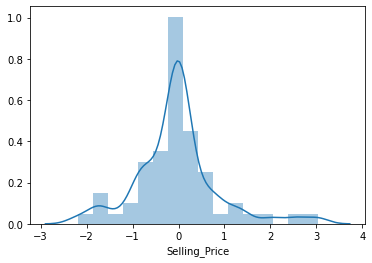

In [10]:
sns.distplot(y_test-ypred)

In [11]:
ypred


array([ 3.9055, 11.0368,  5.8049,  5.7605,  5.8059,  5.304 ,  1.995 ,
        8.8005,  0.457 ,  2.5569,  0.4866,  1.129 , 17.0969,  1.185 ,
        0.5035,  0.4655,  0.709 ,  0.426 ,  5.5528,  1.0365,  6.0322,
        0.2064,  0.4734,  5.4702,  4.2365,  6.7645,  2.8875,  3.2414,
        9.0173,  0.5768,  6.8075,  3.6157,  5.9579,  7.8338,  7.9815,
        3.9755,  9.3638,  0.5323,  0.7716,  0.5613,  4.1525, 10.3601,
        5.67  ,  7.367 ,  0.2565,  9.6088,  6.373 , 16.9941,  2.5085,
        9.195 ,  7.16  ,  1.0585,  0.543 ,  5.3085,  0.7693,  2.9677,
        0.7679,  1.1485,  8.19  , 15.9845,  9.4725])

In [12]:
import pickle
file=open('firstfile.pkl','wb')
pickle.dump(model,file)